# Analyzing Portfolio Risk and Return
This project analyzes the risk and return of four different investment funds in order to make a recommendation for which fund would make the best addition to an investment portfolio. To make this determination, it will take into account several different risk-management metrics: daily return, standard deviation, beta, and the Sharpe ratio.

## Import the Data

#### Import the required libraries and dependencies.

In [64]:
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

#### Using the `read_csv` function and the `Path` module, read the `whale_navs.csv` file into a Pandas DataFrame.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_navs_df = pd.read_csv(
    Path('./resources/whale_navs.csv'),
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True)

whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
daily_returns = whale_navs_df.pct_change().dropna()

daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification.

###  Analyze the Performance of each fund

Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500.

<AxesSubplot:title={'center':'Daily Returns for Four Investment Funds and the S&P 500'}, xlabel='date'>

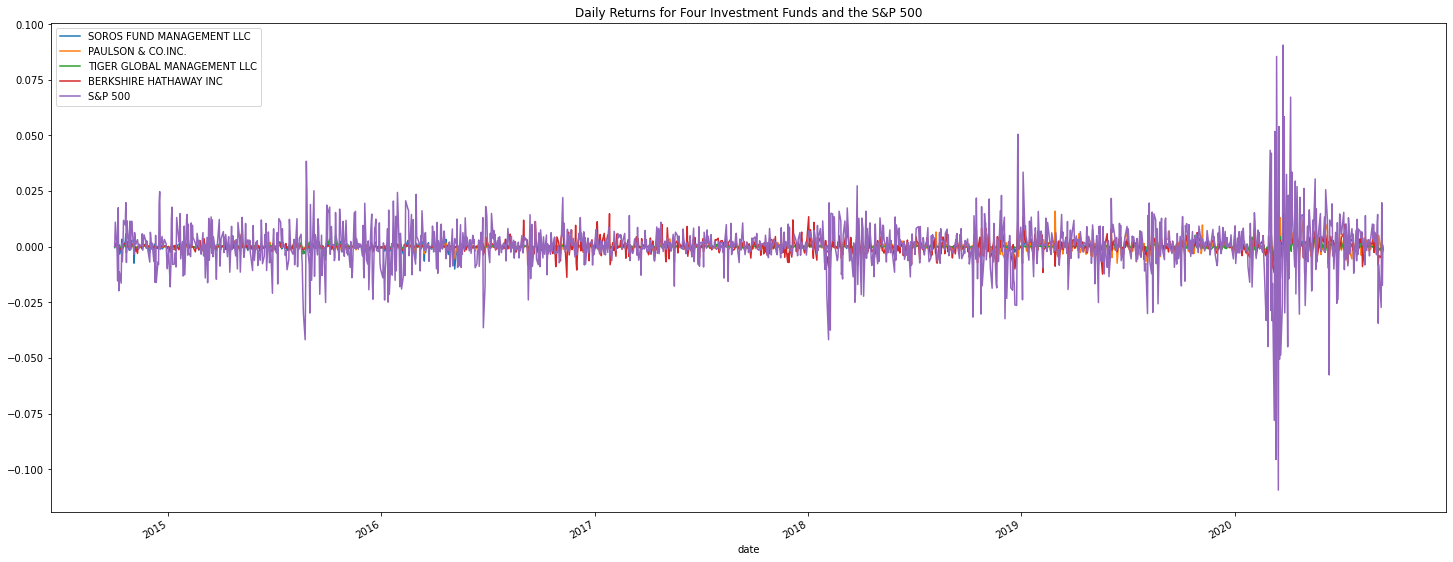

In [69]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns.plot(figsize=(25, 10), title='Daily Returns for Four Investment Funds and the S&P 500')


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [13]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.012645,-0.041813,0.055714,0.244856,0.762645
2020-09-08,-0.014360,-0.043622,0.054373,0.238608,0.714484
2020-09-09,-0.013261,-0.041591,0.057221,0.240858,0.748341
2020-09-10,-0.014502,-0.040260,0.055539,0.237883,0.717983
2020-09-11,-0.014914,-0.042113,0.055081,0.236625,0.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

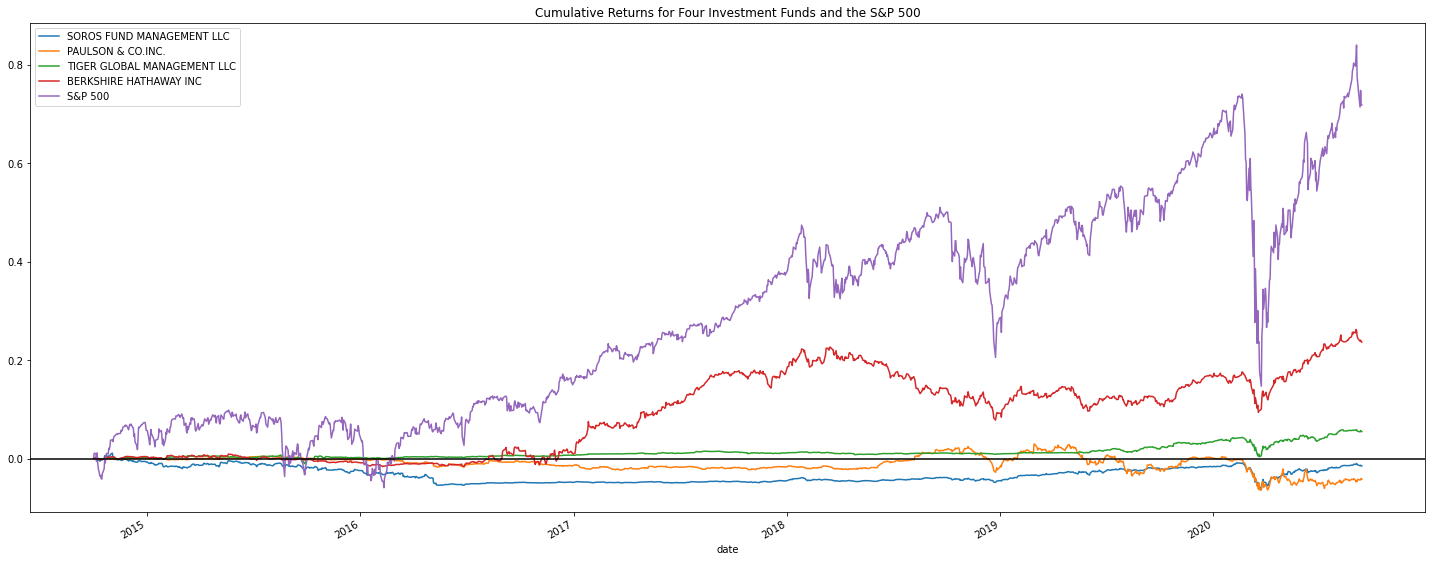

In [65]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
ax = cumulative_returns.plot(figsize=(25, 10), title='Cumulative Returns for Four Investment Funds and the S&P 500')
ax.axhline(y=0, color='black')

## Observations

So far we can observe that, outside of a few brief time periods in 2015 and 2016, none of the funds outperform the S&P 500, although Berkshire Hathaway does come relatively close at times.

---

## Analyzing the Volatility

In this section, we will analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot.

<AxesSubplot:title={'center':'Daily Return Data from Four Investment Funds and the S&P 500, 2014-2020'}>

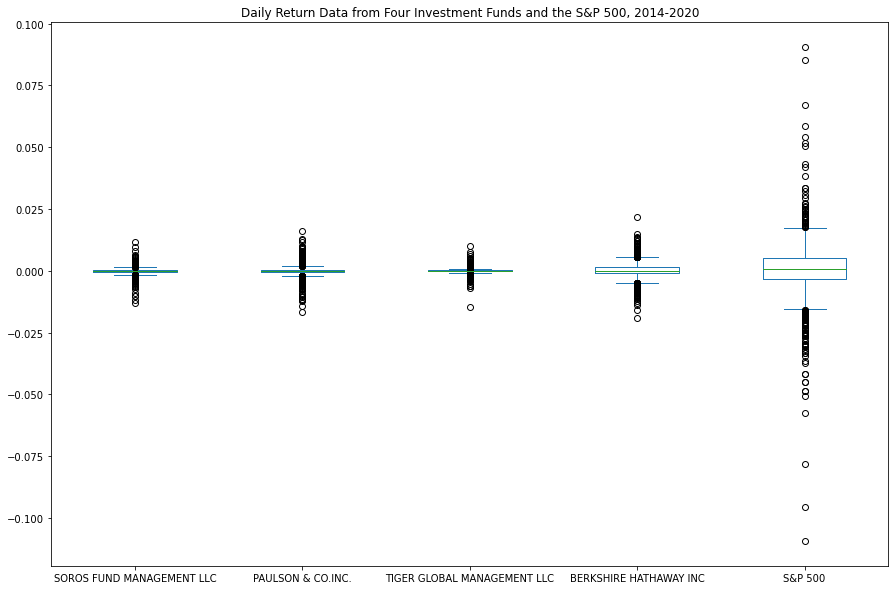

In [70]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot(kind='box', figsize = (15, 10), title='Daily Return Data from Four Investment Funds and the S&P 500, 2014-2020')


#### Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot.

<AxesSubplot:title={'center':'Daily Return data from four investment funds'}>

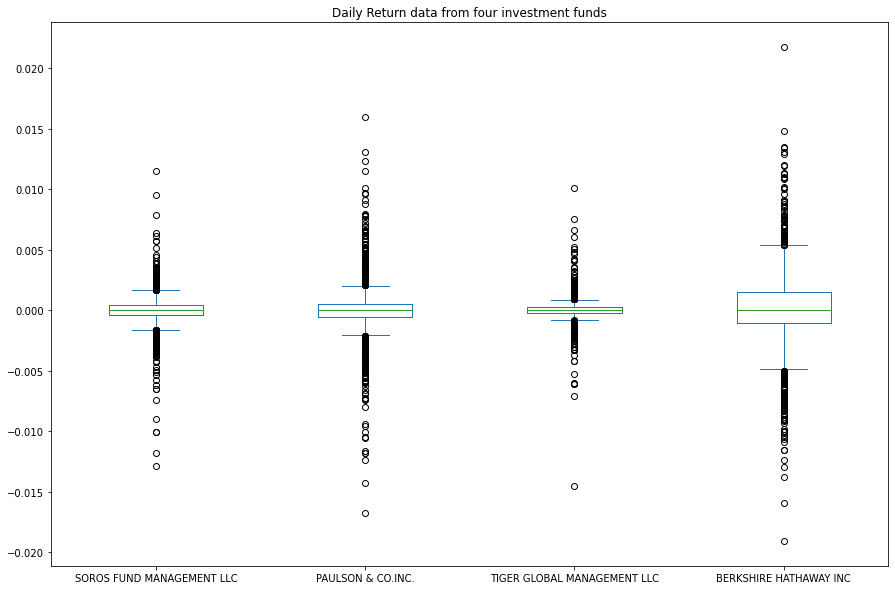

In [20]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
fund_returns = daily_returns.drop(columns='S&P 500')
fund_returns.plot(kind='box', figsize=(15, 10), title='Daily Return data from four investment funds')

## Observation

Based on the box plot visualization, Berkshire Hathaway appears to be the most volative fund, and Tiger Global Managment appears to be the least volatile. However, all of the funds are still considerably less volatile than the broader market.

---

## Analyzing the Risk

In this section, we will evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [25]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
standard_deviations = daily_returns.std().sort_values()
standard_deviations

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500.

In [27]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
trading_days = 252
annualized_standard_deviations = standard_deviations * np.sqrt(trading_days)
annualized_standard_deviations

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviations for Four Investment Funds and the S&P 500'}, xlabel='date'>

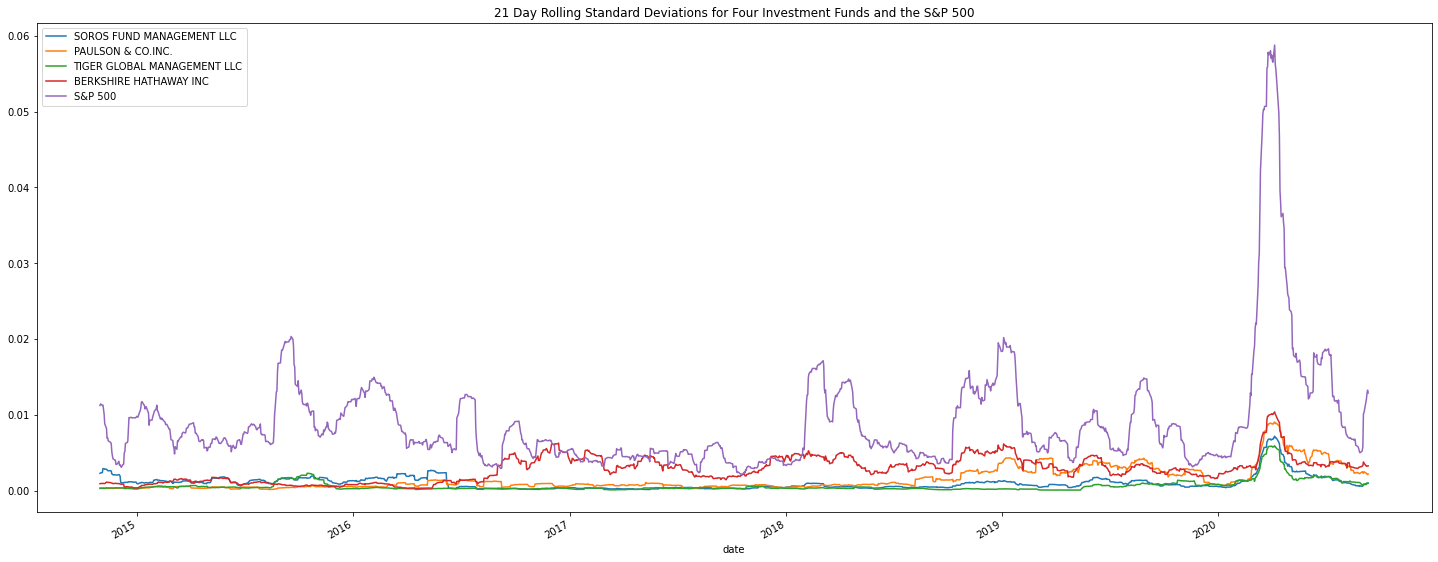

In [30]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns.rolling(window=21).std().plot(
    figsize=(25, 10),
    title='21 Day Rolling Standard Deviations for Four Investment Funds and the S&P 500')


#### Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviations for Four Investment Funds'}, xlabel='date'>

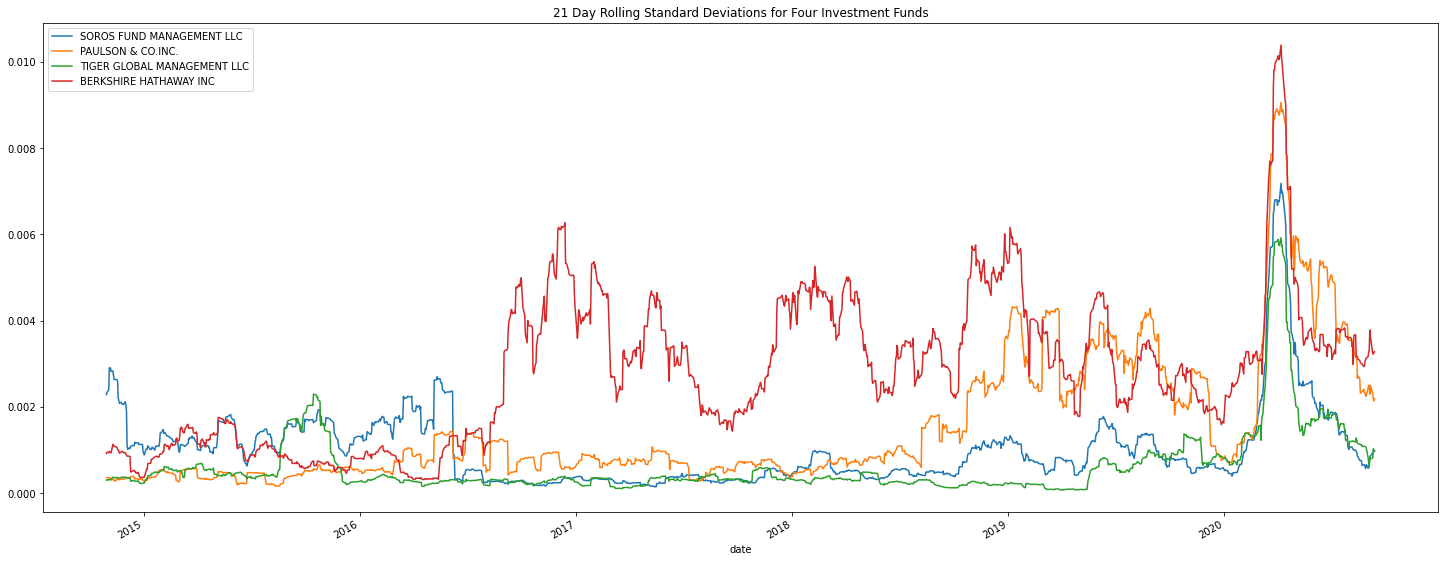

In [31]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
fund_returns.rolling(window=21).std().plot(
    figsize=(25, 10),
    title='21 Day Rolling Standard Deviations for Four Investment Funds')


## Observation

Based on the annualized standard deviations, none of the investment funds pose more risk than the S&P 500.

Based on the rolling metrics, the risk of each of the portfolios does seem to increase at the same time as the risk of the S&P 500, some much more than others. Relatively speaking, Berkshire Hathaway and Paulson & Co follow the S&P 500's risk profile more closely than the other two funds.

Based on the rolling standard deviations, Berkshire Hathaway generally appears to pose the most risk. However, this was not necessarily true during 2015 and the first half of 2016, as well as during certain periods of 2019 and 2020. During 2015 and the first half of 2016, Soros Fund Management generally had a higher rolling standard deviation than Berkshire Hathaway. During certain periods of 2019 and 2020, Paulson & Co. had the highest rolling standard deviation of the four funds. Tiger Global Management almost never had the highest rolling standard deviation, with the exception of a few months in late 2015.

---

## Analyzing the Risk-Return Profile
In this section, we will use the Sharpe ratio to analyze the risk-adjusted return for the investment options.

#### Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500.

In [66]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
annualized_average_returns = (daily_returns.mean() * trading_days).sort_values()
annualized_average_returns

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [67]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratios = (annualized_average_returns / annualized_standard_deviations).sort_values()
sharpe_ratios

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart.

<AxesSubplot:title={'center':'Sharpe Ratios for four Investment Funds and the S&P 500'}>

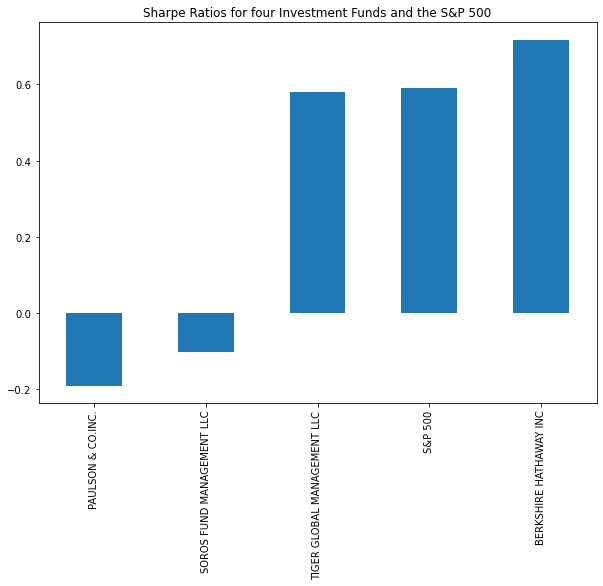

In [35]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot.bar(figsize=(10, 7), title='Sharpe Ratios for four Investment Funds and the S&P 500')


## Observation

According to the Sharpe ratios, Berkshire Hathaway offers the best risk-return profile, better than the S&P 500. Tiger Global Management also has a fairly good risk-return profile, with a Sharpe ratio slightly lower than the S&P 500. Paulson & Co offers the worst risk-to return profile, followed by Soros Fund Management LLC, both of which have Sharpe Ratios less than 0.

---

## Diversify the Portfolio

In this section, we will use the beta along with the other risk-management metrics to determine which fund is the most attractive candidate to add to a diversified investment portfolio. Since we determined in the last section that Berkshire Hathaway and Tiger Global Management LLC had the best risk-return profiles, we will only be looking at those two funds for this determination.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window.

In [51]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
market_rolling_60_variance = daily_returns['S&P 500'].rolling(window=60).var()
market_rolling_60_variance = market_rolling_60_variance.dropna()
market_rolling_60_variance

date
2014-12-26    0.000078
2014-12-29    0.000078
2014-12-30    0.000077
2014-12-31    0.000079
2015-01-02    0.000075
                ...   
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, Length: 1438, dtype: float64

#### Using a 60-day rolling window, calculate the rolling covariance and rolling beta of each fund, and visualize the rolling betas using a line plot for comparison.

##### Portfolio 1 - Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance.

In [52]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
berkshire_hathaway_rolling_60_covariance = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns['S&P 500'])
berkshire_hathaway_rolling_60_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Calculate the beta of the portfolio.

In [58]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
berkshire_hathaway_rolling_60_beta = berkshire_hathaway_rolling_60_covariance / market_rolling_60_variance
berkshire_hathaway_rolling_60_beta = berkshire_hathaway_rolling_60_beta.dropna()
berkshire_hathaway_rolling_60_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [55]:
# Calculate the average of the 60-day rolling beta
berkshire_hathway_average_rolling_beta = berkshire_hathaway_rolling_60_beta.mean()
berkshire_hathway_average_rolling_beta

0.2214986101354593

##### Portfolio 1 - Plot the 60-day rolling beta.

<AxesSubplot:title={'center':'Berkshire Hathaway 60-day Rolling Beta'}, xlabel='date'>

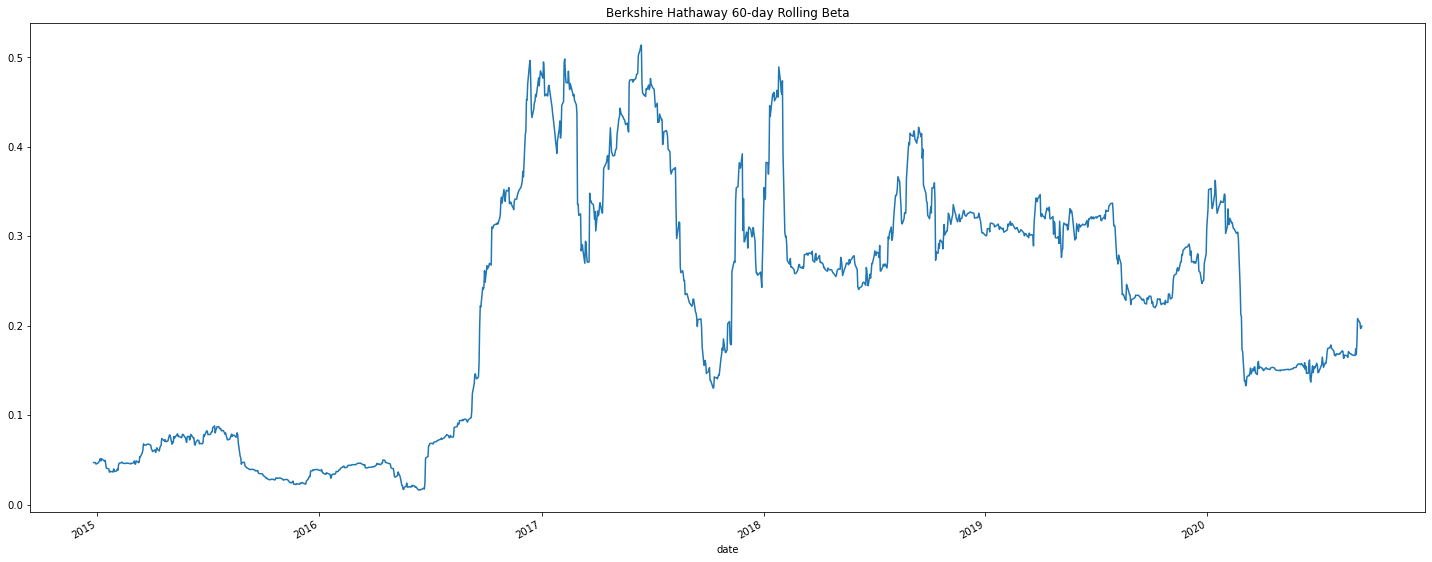

In [56]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
berkshire_hathaway_rolling_60_beta.plot(figsize=(25, 10), title='Berkshire Hathaway 60-day Rolling Beta')


##### Portfolio 2 - Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance.

In [57]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
tiger_gm_rolling_60_covariance = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])
tiger_gm_rolling_60_covariance.tail()


date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio.

In [59]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
tiger_gm_rolling_60_beta = tiger_gm_rolling_60_covariance / market_rolling_60_variance
tiger_gm_rolling_60_beta = tiger_gm_rolling_60_beta.dropna()
tiger_gm_rolling_60_beta.tail()


date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [60]:
# Calculate the average of the 60-day rolling beta
tiger_gm_average_rolling_beta = tiger_gm_rolling_60_beta.mean()
tiger_gm_average_rolling_beta


0.03093001487238774

##### Portfolio 2 - Plot the 60-day rolling beta.

<AxesSubplot:title={'center':'Tiger Global Management 60-day Rolling Beta'}, xlabel='date'>

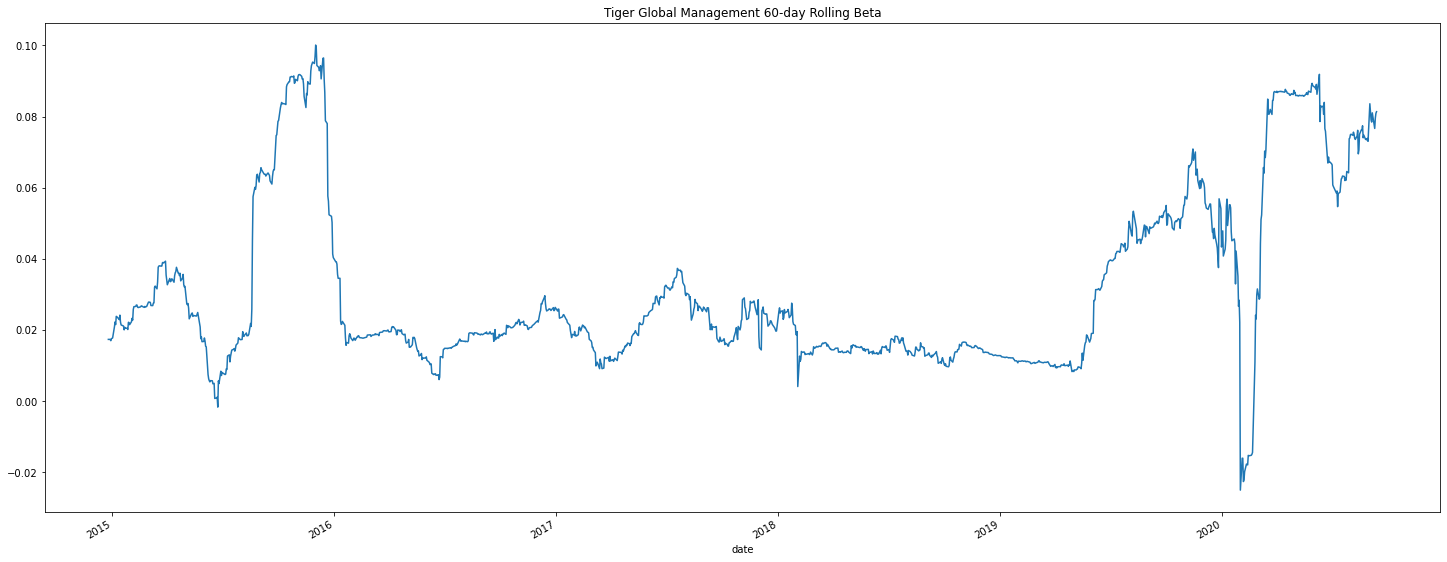

In [62]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
tiger_gm_rolling_60_beta.plot(figsize=(25, 10), title='Tiger Global Management 60-day Rolling Beta')

#### Overlay the two rolling beta visualizations for comparison

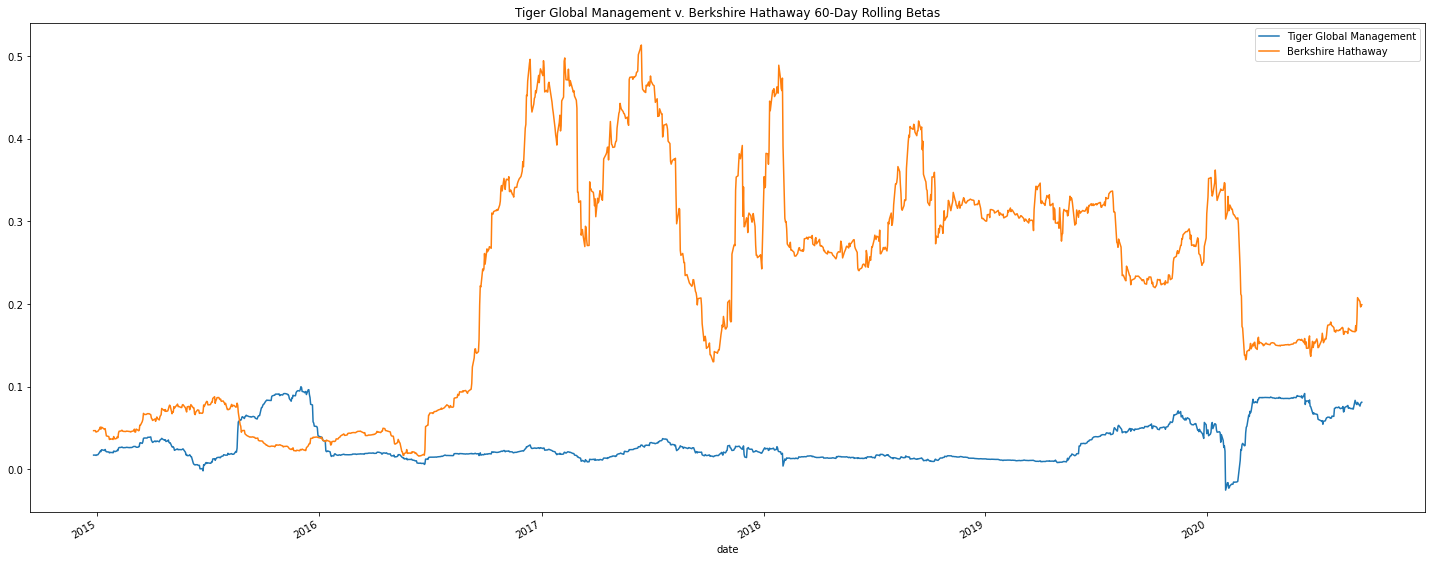

In [63]:
#overlay the rolling beta visualizations
ax = tiger_gm_rolling_60_beta.plot(figsize=(25, 10), title='Tiger Global Management v. Berkshire Hathaway 60-Day Rolling Betas')
berkshire_hathaway_rolling_60_beta.plot(ax=ax)
ax.legend(['Tiger Global Management', 'Berkshire Hathaway'])

## Observation and Conclusion

Based on the 60-day rolling beta, Berkshire Hathaway appears to be more sensitive to movements in the S&P 500, however it is not extremely sensitive, since the beta rarely measures greater than 0.5.

Taking all of the data into account, I recommend Berkshire Hathaway as the best addition to an investment portfolio because, based on its Sharpe ratio, it appears to have the best risk-adjusted return. Although it is more sensitive to market fluctuation than Tiger Global Management, and therefore more volatile, it provides a greater cumulative return, and is significantly less risky than the S&P 500 based on its standard deviation. By investing in this fund, the investor will yield a significant amount of cumulative return while also managing risk by investing in a fund that is less volatile than the market as a whole.

---